In [10]:
import pandas as pd
import numpy as np
import os
import os.path, time
import zipfile as zp
import re
import random
from datetime import datetime, date
from datetime import datetime, timedelta
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from statsmodels.base.model import LikelihoodModel

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import unicodedata
import seaborn as sns; sns.set()

In [3]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

def sub_Dict():
    sub_Dict = dict({99: ['797','806','809','826','843','845','855','856','857'], 
                 114: ['1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934'],
        177:['2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377',
            '2378','2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
            '2401','2402','2404','2405','2407','2434','2444','2456',
             '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']}) 
    return sub_Dict

def GetCohort(subID):
    subDict = sub_Dict()
    for key, value in subDict.items():
        if subID in value:
            return key
        
def subID_list():
    subID = ['797','806','809','826','843','845','855','856','857','1031','1153','1154','1157','1174','1262','1264','1266',
        '1364','1367','1379','1380','1381','1384','1435','1465','1467','1468','1489','1492','1493','1494','1495','1498','1519',
        '1520','1527','1532','1536','1541','1721','1722','1737','1741','1788','1791','1810','1812','1833','1934',
            '2310','2316','2318','2323','2338','2339','2340','2348','2353','2356','2357','2358','2377','2378',
             '2381','2383','2385','2386','2387','2388','2389','2390','2391','2394','2395','2396','2399',
             '2401','2402','2404','2405','2407','2434','2444','2456',
            '2433','2447','2477','2479','2489','2547','2548','2549','2553','2555','2558','2559','2578','2951','2958',
            '2961','2962','2963','2964','2967','2968','2975','2977','2978','2981','2983',
             '2998','2999','3051','3052','3053']
    return subID


In [22]:
iv_df = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Independent_variable_1.csv")
dv_df = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/Dependent_variable.csv")
model_free_df = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/model_free_variable.csv")
TD_df = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/TD_variable.csv")
age_gender_df = pd.read_csv("/Users/zyy219/Documents/Risk_project/Data/age_gender_df.csv")

df = iv_df.drop(['Unnamed: 0','E_RP','F_RP','S_RP','R_RP','S_RP.1','E_EB','F_EB','S_EB','R_EB','S_EB.1'], axis = 1)
v_free = model_free_df[['risk_ratio','amb_ratio','risk_RT','TD_ratio','TD_RT']]
v_demo =age_gender_df[['Gender','Age']]
v_TD = TD_df[['k','TD_gamma']]
v_model = dv_df[['alpha_EU','gamma_EU','alpha_ESVT','M_ESVT','gamma_ESVT',]]
df = pd.concat([df,v_free,v_demo,v_TD,v_model ],axis = 1)

In [23]:
subID = subID_list()
R = ['843','856','857','1031','1381','1435','1465','1492',
     '1493','1519','1520','1721','2340','2378','2387','2401','2444','2447','3053']
N = [i for i in range(len(subID)) if subID[i] in R]

df1 = df[~df.subID.isin(R)]
censored_df = df1.drop(['subID'], axis = 1)

In [26]:
censored_df
rho_censored = censored_df.corr()
pval_censored = censored_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho_censored.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
rho1_censored = rho_censored.round(2).astype(str) + p

In [36]:
df2 = df[df.subID.isin(R)]
df2 = df2.drop(['subID'], axis = 1)
rho_df2 = df2.corr()
pval_df2 = df2.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho_censored.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
rho_df2 = rho_df2.round(2).astype(str) + p

In [38]:
rho_df2.iloc[:,21:35]

,risk_ratio,amb_ratio,risk_RT,TD_ratio,TD_RT,Gender,Age,k,TD_gamma,alpha_EU,gamma_EU,alpha_ESVT,M_ESVT,gamma_ESVT
E_LI,0.05,0.11,-0.16,-0.0,-0.06,0.11,0.02,-0.2,0.31,-0.04,0.15,-0.12,0.14,-0.11
F_LI,0.11*,0.02,-0.28,0.17,-0.09,-0.19*,0.05,-0.37,0.18,-0.07**,-0.06,0.11,0.46,-0.18
S_LI,0.44**,0.21,-0.43,0.19,-0.09,-0.0,-0.37,-0.24,0.17,0.43**,-0.26*,0.26,0.16*,-0.39
R_LI,0.46*,0.41,-0.45,0.1,-0.38,-0.19,-0.37,-0.24,0.02,0.4*,-0.26,0.23,0.55,-0.24
S_LI.1,0.0,0.08,-0.2,0.16,0.04,-0.12,0.41**,-0.39,0.45,-0.02,0.28,0.04,-0.09,0.29
IUS,0.12,0.05,-0.26,0.31*,0.2,-0.05*,-0.07,-0.47*,0.19,0.1,0.06,0.13,-0.29,-0.08
lot_pos,0.33,0.09,0.25,-0.28*,0.06,-0.29,-0.01*,0.08,-0.07,0.29,-0.45*,0.09,0.16,-0.37
lot_neg,0.48,0.32,-0.3*,0.15,0.12,0.13,-0.54*,-0.12,-0.06,0.52,-0.17,0.51*,0.02*,-0.37*
drm_pos,0.15*,0.16,-0.03,-0.05,-0.08,-0.01*,0.32**,-0.31,-0.23*,0.2*,-0.3*,-0.16,0.16,0.04
drm_neg,0.3,0.19,-0.32,0.22,-0.09,-0.02,-0.42,-0.03,0.3,0.34*,-0.02,0.3,-0.08,-0.25


In [31]:
#rho1_censored
#rho1_censored.to_csv("/Users/zyy219/Documents/Risk_project/Data/correlation_matrix_censored.csv")
rho1_censored.iloc[:,21:35]

,risk_ratio,amb_ratio,risk_RT,TD_ratio,TD_RT,Gender,Age,k,TD_gamma,alpha_EU,gamma_EU,alpha_ESVT,M_ESVT,gamma_ESVT
E_LI,-0.0,-0.02,0.06,0.1,0.06,0.02,0.03,-0.06,0.08,0.22,-0.01,-0.05,0.03,-0.0
F_LI,0.27*,0.19,-0.07,0.07,-0.02,0.32*,-0.01,-0.06,-0.09,0.4**,-0.16,-0.11,0.12,0.12
S_LI,0.17**,0.0,0.22,-0.07,0.21,0.08,0.21,-0.03,-0.05,0.2**,-0.17*,-0.07,0.2*,0.03
R_LI,0.09*,-0.04,0.08,-0.0,0.11,0.19,0.02,-0.07,-0.05,0.15*,-0.07,-0.14,0.06,0.0
S_LI.1,-0.03,-0.15,0.04,-0.1,0.14,0.25,0.27**,0.06,0.05,0.04,0.08,-0.04,0.0,-0.03
IUS,-0.05,-0.12,-0.02,0.17*,0.03,-0.27*,-0.14,-0.09*,0.03,0.03,0.06,-0.03,-0.05,-0.03
lot_pos,0.03,0.02,0.03,-0.21*,0.12,0.13,0.25*,0.14,-0.19,0.06,-0.08*,0.0,0.05,-0.03
lot_neg,-0.1,-0.12,-0.15*,-0.04,-0.14,-0.07,-0.14*,0.06,0.15,0.02,0.0,0.01*,-0.25*,-0.23*
drm_pos,0.22*,0.17,0.01,-0.14,0.03,0.25*,0.22**,0.13,-0.18*,0.25*,-0.26*,0.01,0.07,-0.09
drm_neg,-0.0,-0.04,-0.1,0.03,-0.04,0.06,-0.07,0.01,-0.03,0.18*,0.01,0.08,-0.14,-0.05


In [6]:
a = 1-(1- 0.05)**(1/(35))
a

0.0014644493428053185

In [33]:
rho = df.iloc[:,1:].corr()
pval = df.iloc[:,1:].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
rho1 = rho.round(2).astype(str) + p
#rho1.to_csv("/Users/zyy219/Documents/Risk_project/Data/correlation_matrix.csv")

In [35]:
rho1.iloc[:,21:35].round(3)

,risk_ratio,amb_ratio,risk_RT,TD_ratio,TD_RT,Gender,Age,k,TD_gamma,alpha_EU,gamma_EU,alpha_ESVT,M_ESVT,gamma_ESVT
E_LI,0.02,0.02,-0.03,0.05,0.03,0.03,0.07,-0.09,0.1,0.14,0.08,-0.01,0.05,-0.07
F_LI,0.24*,0.16,-0.13,0.07,-0.03,0.21*,0.04,-0.13,-0.07,0.3**,-0.1,0.05,0.17,0.04
S_LI,0.24**,0.05,0.02,-0.0,0.11,0.07,0.06,-0.1,-0.01,0.25**,-0.19*,0.05,0.19*,0.03
R_LI,0.2*,0.07,-0.08,0.01,-0.03,0.1,-0.04,-0.1,-0.05,0.21*,-0.13,0.07,0.14,-0.05
S_LI.1,-0.02,-0.1,-0.04,-0.03,0.1,0.18,0.28**,-0.09,0.13,0.03,0.16,-0.02,-0.01,0.0
IUS,-0.02,-0.09,-0.08,0.21*,0.06,-0.21*,-0.16,-0.21*,0.07,0.04,0.05,-0.02,-0.08,0.02
lot_pos,0.11,0.04,0.09,-0.23*,0.11,0.05,0.21*,0.13,-0.18,0.11,-0.2*,0.06,0.06,-0.06
lot_neg,0.05,-0.02,-0.19*,-0.01,-0.06,-0.03,-0.21*,0.02,0.1,0.12,-0.06,0.21*,-0.2*,-0.21*
drm_pos,0.21*,0.18,-0.0,-0.14,0.02,0.19*,0.28**,0.03,-0.21*,0.24*,-0.22*,0.02,0.07,-0.13
drm_neg,0.07,0.01,-0.16,0.08,-0.06,0.05,-0.16,-0.01,0.03,0.21*,-0.0,0.12,-0.12,-0.03


Text(0.5, 1, 'Correlation Matrix')

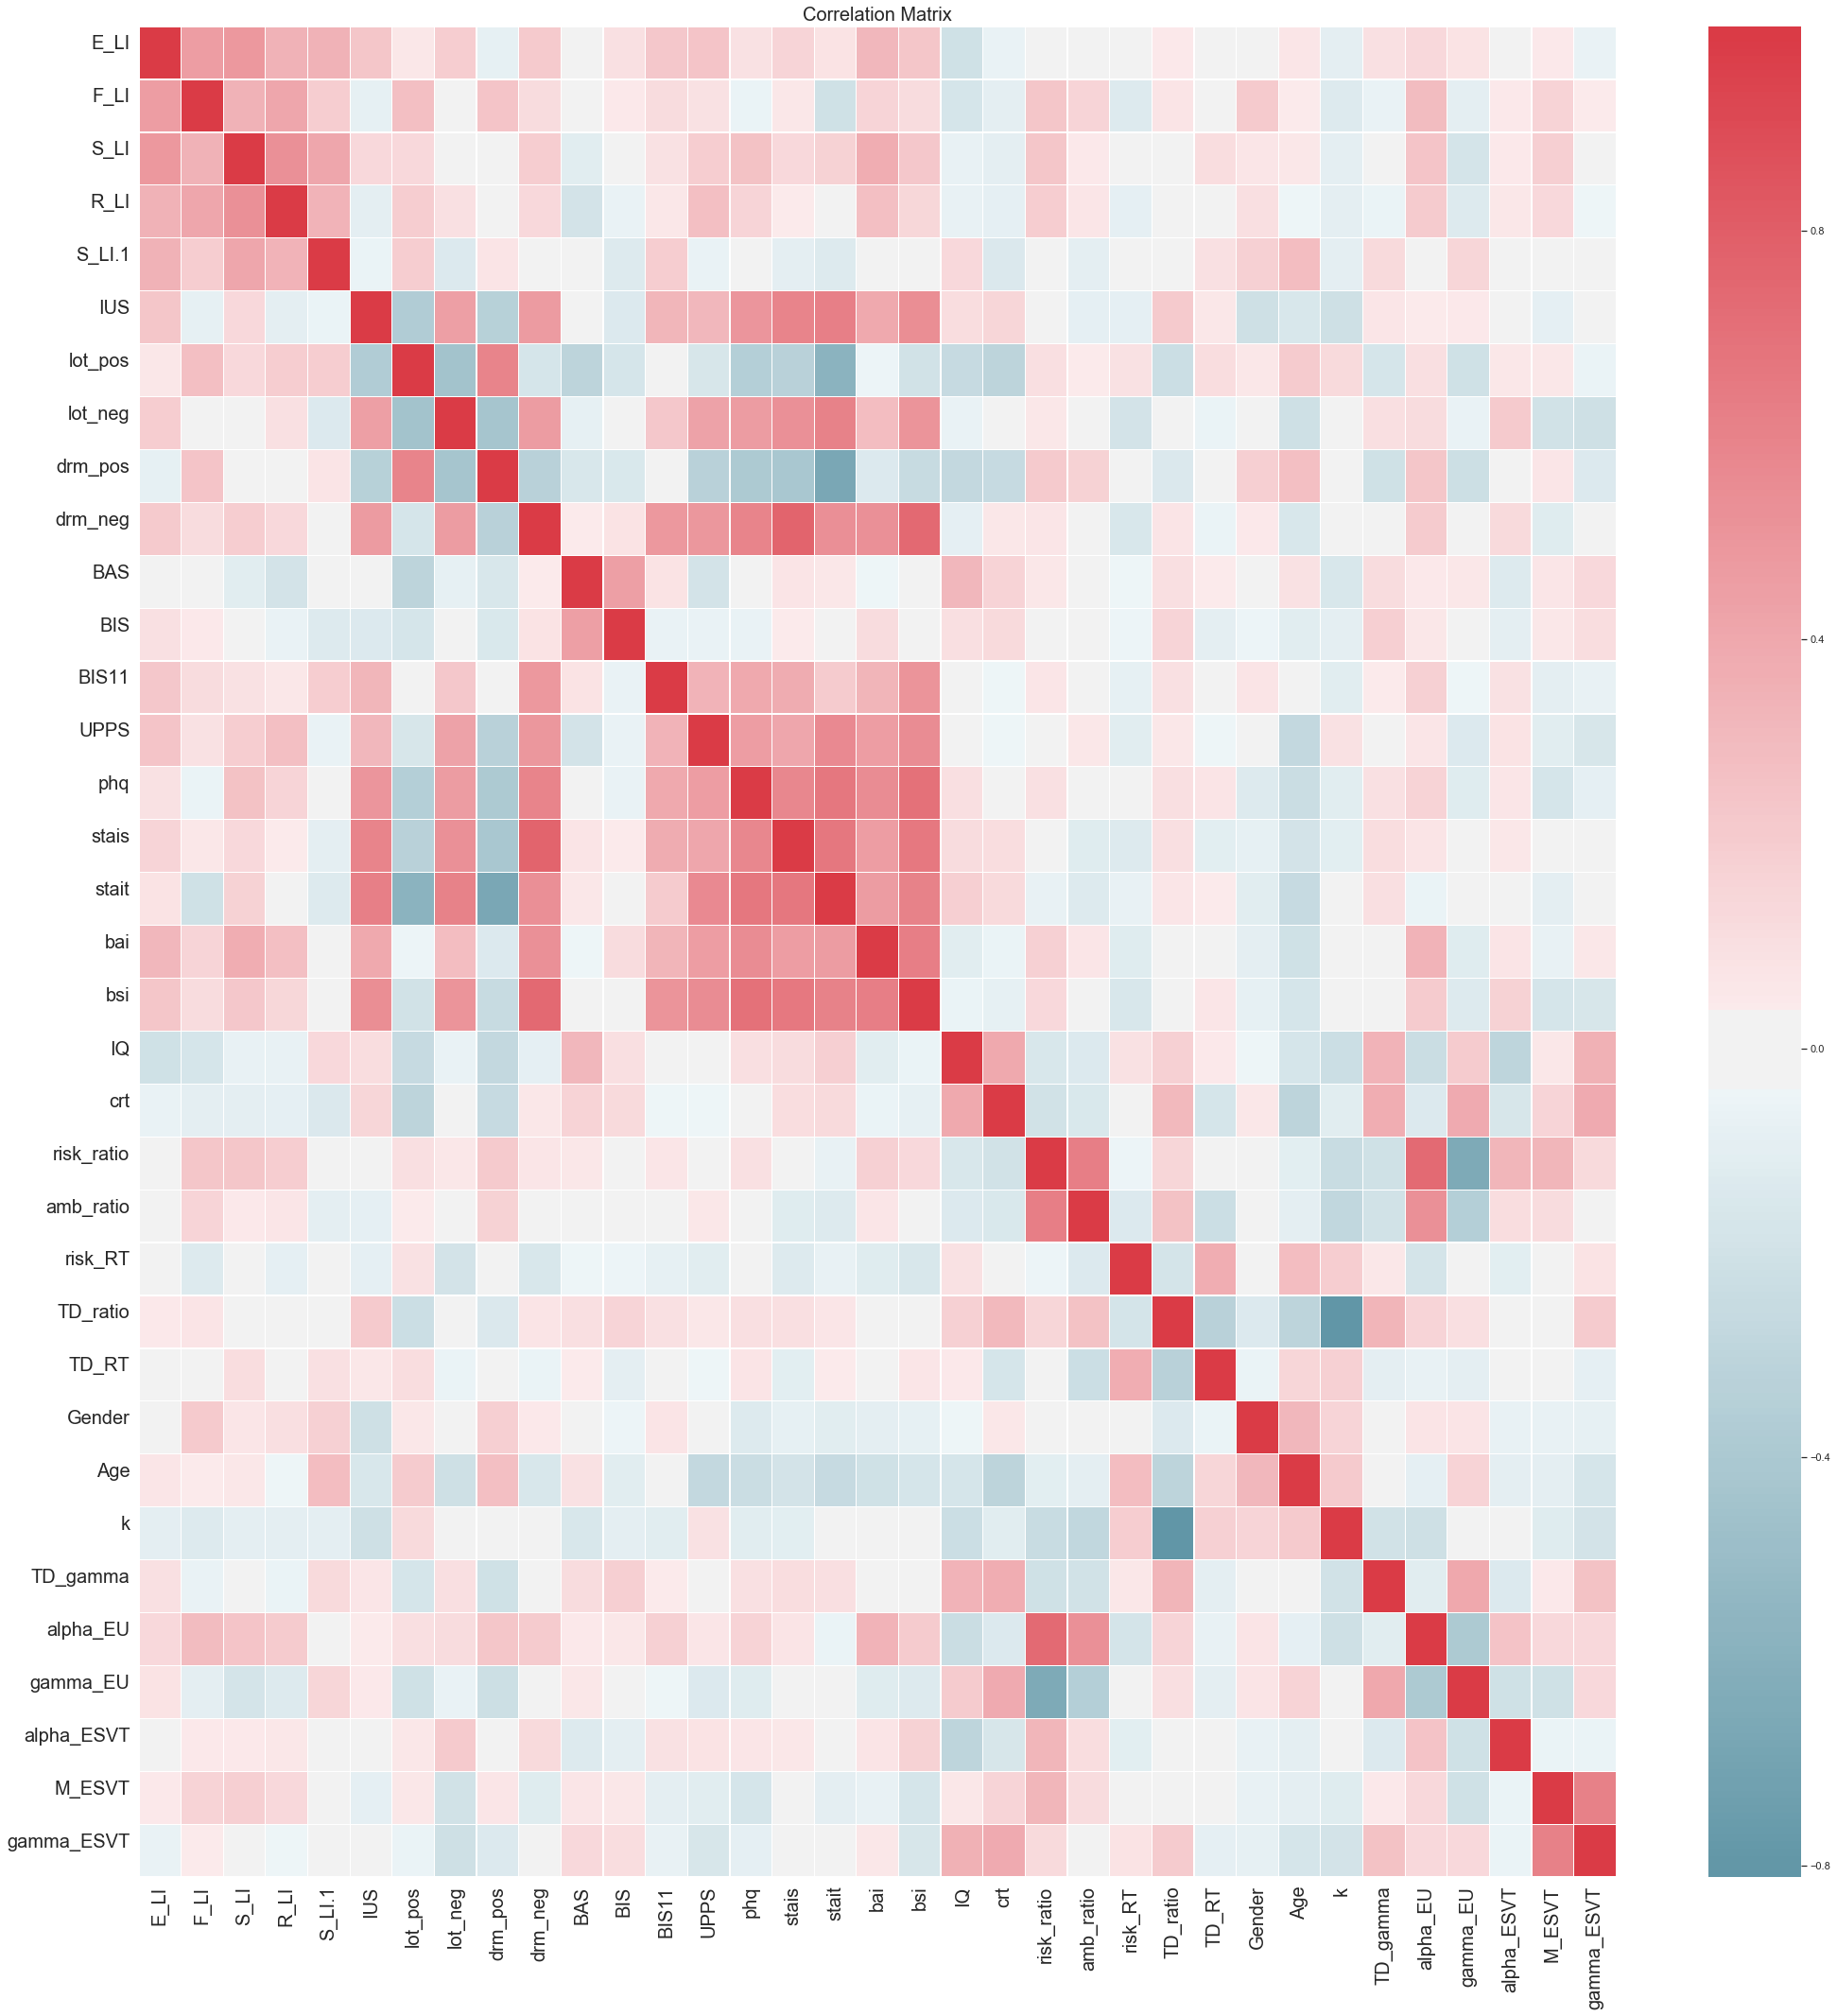

In [18]:
f, ax = plt.subplots(figsize=(35, 36))
        
        # Diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with a color bar
sns.heatmap(rho, cmap=cmap, center=0,
                    linewidths=0.25, cbar_kws={"shrink": 1})

        # Set the ylabels 
ax.set_yticks([x + 0.3 for x in list(range(rho.shape[0]))])
ax.set_yticklabels(list(rho.index),size = 20);

        # Set the xlabels 
ax.set_xticks([x + 0.5 for x in list(range(rho.shape[1]))])
ax.set_xticklabels(list(rho.columns), size = 20);
plt.title('Correlation Matrix', size = 20)